Billy has his exams coming up. He hasn’t been performing well on maths throughout the year, but this time he has an idea. He has the data of his friends and how they have fared in the exam. But when he tries to feed the data to his computer, the computer denies it and says it only understands numeric values. Now it’s up to you to help him. 

**With the given dataset, named “student-math”, import the dataset using the library pandas, and create a dataframe of it.**

**As there are three grades given, create a new column named “final_grade”, which shall be the sum of the respective three grades in the row.**

**Delete the three grades from the dataframe after step 2.**

**Replace all binary values with 1 and 0 in the dataframe. E.g. – For values having “Yes”, replace them with 1, and for values having “No”, replace them with 0. Do this for all columns having binary type of values.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('student-math.csv',sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
df['final_grade']=df['G1']+df['G2']+df['G3']
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,17
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,16
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,25
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,44
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,26


In [5]:
df.drop(columns=['G1','G2','G3']).head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,17
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,16
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,25
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,44
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,26


In [6]:
for i in df.columns:
    if len(df[i].unique())==2 : print(i," :::  binary values present : ",df[i].unique())

school  :::  binary values present :  ['GP' 'MS']
sex  :::  binary values present :  ['F' 'M']
address  :::  binary values present :  ['U' 'R']
famsize  :::  binary values present :  ['GT3' 'LE3']
Pstatus  :::  binary values present :  ['A' 'T']
schoolsup  :::  binary values present :  ['yes' 'no']
famsup  :::  binary values present :  ['no' 'yes']
paid  :::  binary values present :  ['no' 'yes']
activities  :::  binary values present :  ['no' 'yes']
nursery  :::  binary values present :  ['yes' 'no']
higher  :::  binary values present :  ['yes' 'no']
internet  :::  binary values present :  ['no' 'yes']
romantic  :::  binary values present :  ['no' 'yes']


In [7]:
for i in df.columns:
    if len(df[i].unique())==2 :
        df[i]=df[i].astype('category',copy=False)
        df[i]=df[i].cat.codes
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_grade
0,0,0,18,1,0,0,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,17
1,0,0,17,1,0,1,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,16
2,0,0,15,1,1,1,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,25
3,0,0,15,1,0,1,4,2,health,services,...,2,2,1,1,5,2,15,14,15,44
4,0,0,16,1,0,1,3,3,other,other,...,3,2,1,2,5,4,6,10,10,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,services,services,...,5,4,4,5,4,11,9,9,9,27
391,1,1,17,1,1,1,3,1,services,services,...,4,5,3,4,2,3,14,16,16,46
392,1,1,21,0,0,1,1,1,other,other,...,5,3,3,3,3,3,10,8,7,25
393,1,1,18,0,1,1,3,2,services,other,...,4,1,3,4,5,0,11,12,10,33


In [8]:
for i in df.columns:
    if len(df[i].unique())==2 : print(i," :::  binary values present : ",df[i].unique())

school  :::  binary values present :  [0 1]
sex  :::  binary values present :  [0 1]
address  :::  binary values present :  [1 0]
famsize  :::  binary values present :  [0 1]
Pstatus  :::  binary values present :  [0 1]
schoolsup  :::  binary values present :  [1 0]
famsup  :::  binary values present :  [0 1]
paid  :::  binary values present :  [0 1]
activities  :::  binary values present :  [0 1]
nursery  :::  binary values present :  [1 0]
higher  :::  binary values present :  [1 0]
internet  :::  binary values present :  [0 1]
romantic  :::  binary values present :  [0 1]


---

### Plot a scatter plot between the values of column “studytime” and your new column named “final_grade” that you created in step 2. Observe the relation between both the attributes. You can assign different colours/symbols for the points of a particular time step of “studytime” to observe it better.

In [9]:
df[['studytime','final_grade']]

,studytime,final_grade
0,2,17
1,2,16
2,2,25
3,3,44
4,2,26
...,...,...
390,2,27
391,1,46
392,1,25
393,1,33


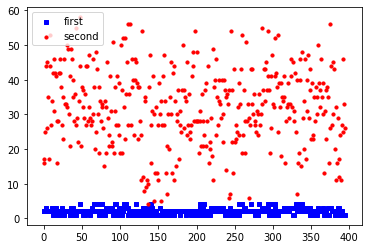

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(range(395),df['studytime'], s=10, c='b', marker="s", label='first')
ax1.scatter(range(395),df['final_grade'], s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left');

**Study time is max from 1-4 for all students whereas the final grade was equally distributed in the entire graph ranging from nearly 5 till 60.Hence we conclude study time is not the most vital factor to judge grades as students with nearly same study time also had extreme difference in grades.**

### Plot a boxplot of the new column “final_grade” and the column “studytime” in the same graph, and observe the difference between them. 

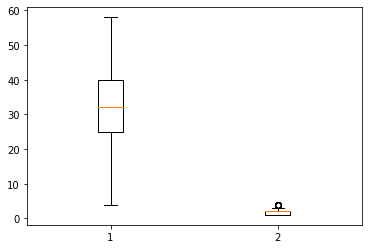

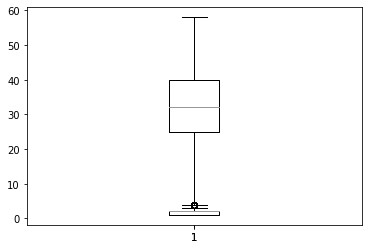

In [29]:
plt.boxplot([df['final_grade'],df['studytime']])
plt.show();


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.boxplot(df['studytime'])
ax1.boxplot(df['final_grade'])
plt.show;

**The final grades range from 5 to 58 values with a median at around 32**

* 25% of students have final grades below 28

* 50% of students have final grades between 25-40

* 25% of students have final grades above 40

**The study time of all students ranges 1-4 hrs.**

**The final grades are widely distributed but study time for all is nearly the same in range of 1-4 hrs.**